In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [118]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('test.csv')

In [119]:
df.head()

MMM-YY  Emp_ID  Age Gender City Education_Level  Salary Dateofjoining  \
0  2016-01-01       1   28   Male  C23          Master   57387    2015-12-24   
1  2016-02-01       1   28   Male  C23          Master   57387    2015-12-24   
2  2016-03-01       1   28   Male  C23          Master   57387    2015-12-24   
3  2017-11-01       2   31   Male   C7          Master   67016    2017-11-06   
4  2017-12-01       2   31   Male   C7          Master   67016    2017-11-06   

  LastWorkingDate  Joining Designation  Designation  Total Business Value  \
0             NaN                    1            1               2381060   
1             NaN                    1            1               -665480   
2      2016-03-11                    1            1                     0   
3             NaN                    2            2                     0   
4             NaN                    2            2                     0   

   Quarterly Rating  
0                 2  
1                 2  
2                 2  
3                 1  
4                 1

In [120]:
df.shape

(19104, 13)

In [121]:
df.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [122]:
#Creating a Attrition column
df['Attrition'] = df['LastWorkingDate'].fillna(0)
df['Attrition'] = np.where(df['Attrition']==0 ,0, 1)

In [123]:
# Identifying categorical and continous variable
df.dtypes

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
Attrition                int32
dtype: object

In [124]:
# Univariate analysis of continous variable
df.describe()

Emp_ID           Age         Salary  Joining Designation  \
count  19104.000000  19104.000000   19104.000000         19104.000000   
mean    1415.591133     34.650283   65652.025126             1.690536   
std      810.705321      6.264471   30914.515344             0.836984   
min        1.000000     21.000000   10747.000000             1.000000   
25%      710.000000     30.000000   42383.000000             1.000000   
50%     1417.000000     34.000000   60087.000000             1.000000   
75%     2137.000000     39.000000   83969.000000             2.000000   
max     2788.000000     58.000000  188418.000000             5.000000   

        Designation  Total Business Value  Quarterly Rating     Attrition  
count  19104.000000          1.910400e+04      19104.000000  19104.000000  
mean       2.252670          5.716621e+05          2.008899      0.084590  
std        1.026512          1.128312e+06          1.009832      0.278277  
min        1.000000         -6.000000e+06          1.000000      0.000000  
25%        1.000000          0.000000e+00          1.000000      0.000000  
50%        2.000000          2.500000e+05          2.000000      0.000000  
75%        3.000000          6.997000e+05          3.000000      0.000000  
max        5.000000          3.374772e+07          4.000000      1.000000

In [125]:
df['MMM-YY'].value_counts()

2016-01-01    1022
2016-02-01     944
2016-03-01     870
2017-12-01     819
2017-10-01     818
2017-08-01     812
2017-09-01     809
2017-07-01     806
2017-11-01     805
2016-12-01     795
2016-04-01     794
2017-01-01     782
2016-11-01     781
2017-06-01     770
2017-05-01     766
2016-05-01     764
2016-09-01     762
2017-02-01     761
2016-07-01     757
2016-08-01     754
2016-10-01     739
2017-04-01     729
2016-06-01     726
2017-03-01     719
Name: MMM-YY, dtype: int64

In [126]:
# looking for corelation between continous variable
df.corr()

Emp_ID       Age    Salary  Joining Designation  \
Emp_ID                1.000000  0.006652 -0.035767            -0.035166   
Age                   0.006652  1.000000  0.192225            -0.005726   
Salary               -0.035767  0.192225  1.000000             0.380878   
Joining Designation  -0.035166 -0.005726  0.380878             1.000000   
Designation          -0.025712  0.211515  0.778383             0.559854   
Total Business Value  0.003896  0.109426  0.234044            -0.044446   
Quarterly Rating      0.017917  0.172660  0.116897            -0.237791   
Attrition            -0.000675 -0.063656 -0.100896             0.020249   

                      Designation  Total Business Value  Quarterly Rating  \
Emp_ID                  -0.025712              0.003896          0.017917   
Age                      0.211515              0.109426          0.172660   
Salary                   0.778383              0.234044          0.116897   
Joining Designation      0.559854             -0.044446         -0.237791   
Designation              1.000000              0.220955          0.014445   
Total Business Value     0.220955              1.000000          0.471224   
Quarterly Rating         0.014445              0.471224          1.000000   
Attrition               -0.089486             -0.142921         -0.260493   

                      Attrition  
Emp_ID                -0.000675  
Age                   -0.063656  
Salary                -0.100896  
Joining Designation    0.020249  
Designation           -0.089486  
Total Business Value  -0.142921  
Quarterly Rating      -0.260493  
Attrition              1.000000

In [127]:
# Univariate analysis of categorical variable
df['Gender'].value_counts()/len(df['Gender'])

Male      0.581187
Female    0.418813
Name: Gender, dtype: float64

In [128]:
df['Education_Level'].value_counts()/len(df['Education_Level'])

Bachelor    0.359296
Master      0.331187
College     0.309516
Name: Education_Level, dtype: float64

In [129]:
df['City'].value_counts()/len(df['City'])

C20    0.052764
C29    0.047111
C26    0.045488
C22    0.042347
C27    0.041143
C15    0.039835
C10    0.038945
C12    0.038055
C8     0.037270
C16    0.037113
C28    0.035752
C1     0.035438
C6     0.034548
C5     0.034338
C14    0.033920
C3     0.033344
C24    0.032140
C7     0.031878
C21    0.031564
C25    0.030570
C19    0.030308
C4     0.030255
C13    0.029784
C18    0.028476
C23    0.028162
C9     0.027219
C2     0.024707
C11    0.024497
C17    0.023032
Name: City, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Salary'>

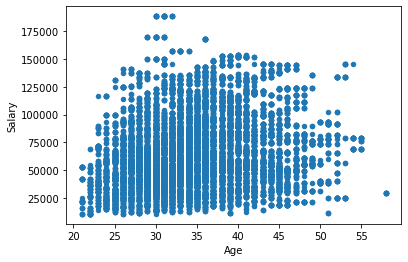

In [130]:
df.plot.scatter('Age','Salary')

<AxesSubplot:xlabel='Attrition'>

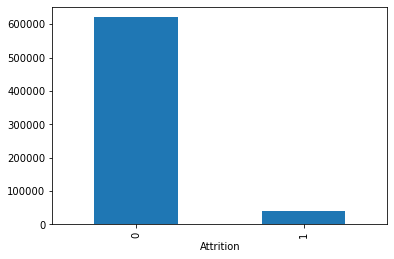

In [131]:
#Bivariate Analysis of Categorical and Continous Variable
df.groupby('Attrition')['Total Business Value'].mean().plot.bar()

In [132]:
x = pd.crosstab(df['Gender'],df['Attrition'])
x

Attrition      0    1
Gender               
Female      7333  668
Male       10155  948

In [133]:
# Looking for null values
df.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
Attrition                   0
dtype: int64

In [134]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['MMM-YY'] = le.fit_transform(df['MMM-YY'])

In [135]:
def cleanData(data):
    
    data['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
    data['Education_Level'].replace({'Bachelor':0,'Master':1,'College':2},inplace=True)
    
     # Data missing and categorical to drop
    data.drop(['LastWorkingDate','Dateofjoining'], axis=1, inplace=True)
    
    
    return data

In [136]:
df = cleanData(df)

In [137]:
df.head()

MMM-YY  Emp_ID  Age  Gender  City  Education_Level  Salary  \
0       0       1   28       0    15                1   57387   
1       1       1   28       0    15                1   57387   
2       2       1   28       0    15                1   57387   
3      22       2   31       0    26                1   67016   
4      23       2   31       0    26                1   67016   

   Joining Designation  Designation  Total Business Value  Quarterly Rating  \
0                    1            1               2381060                 2   
1                    1            1               -665480                 2   
2                    1            1                     0                 2   
3                    2            2                     0                 1   
4                    2            2                     0                 1   

   Attrition  
0          0  
1          0  
2          1  
3          0  
4          0

In [138]:
x = pd.get_dummies(df.drop(['Attrition'],axis = 1))
y = df['Attrition']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=101,test_size=741,stratify=y)

In [141]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3,criterion='gini')

In [142]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=3)

In [143]:
clf.score(train_x,train_y)

0.9154277623482002

In [144]:
test_x.head()

MMM-YY  Emp_ID  Age  Gender  City  Education_Level  Salary  \
7490       18    1111   39       0    20                1  153109   
11504      10    1704   30       1     9                0  114651   
6856       14    1033   27       0     3                2   41705   
16023      16    2381   47       0    10                0   77114   
1219        7     180   34       0    21                0   95694   

       Joining Designation  Designation  Total Business Value  \
7490                     3            4                966180   
11504                    1            3               2750000   
6856                     1            1                851210   
16023                    1            2                425660   
1219                     2            4                     0   

       Quarterly Rating  
7490                  2  
11504                 4  
6856                  2  
16023                 3  
1219                  1

In [145]:
clf.predict(test_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [146]:
clf.score(test_x,test_y)

0.9149797570850202

In [147]:
df2=df1['Emp_ID'].tolist()
df3=df.loc[df['Emp_ID'].isin(df2)]
df3=df3.drop_duplicates(subset='Emp_ID')

In [148]:
df4 = pd.get_dummies(df3.drop(['Attrition'],axis = 1))

In [149]:
predict = clf.predict(df4)

In [150]:
output = pd.DataFrame({'Emp_ID': df3.Emp_ID, 'Target': predict})

In [151]:
output.to_csv('my_submission.csv', index=False)
print("Submission saved")

Submission saved
